# Practistics Analytics Template
This is a template made for use with Practistics scrim data. Instructions:
-- Load as many scrim CSVs (of the same map) as required into a directory.
-- Paste the file paths of all the CSVs into the read CSVs function. 
-- Execute all the cells for the required analytics each cell provides.

In [192]:
!pip install matplotlib -q
!pip install seaborn -q
!pip install pandas -q

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')

## Loading CSVs:
Enter all the file paths of the CSVs here, how many ever there are: 
(Make sure all the paths are inside the `[ ]` square brackets, surrounded by `' '` marks, and seperated by `,` commas)

**Example:**

>path_list = ['D:\PROJECTS\practistics-template\08_09_2023_Split_9-13.csv', 'D:\PROJECTS\practistics-template\08_09_2023_Split_13-9.csv']

In [194]:
path_list = [r'D:\PROJECTS\practistics-template\08_09_2023_Split_9-13.csv', r'D:\PROJECTS\practistics-template\08_09_2023_Split_13-9.csv', r'D:\PROJECTS\practistics-template\split_22_08_2023_time_12_56.csv', r'D:\PROJECTS\practistics-template\08_09_2023_Split_10-13.csv']

df = load_concat_csv(path_list)

df.team_buy = df.team_buy.str.replace(',','')
df.oppo_buy = df.oppo_buy.str.replace(',','')

df.team_buy = df.team_buy.astype(int)
df.oppo_buy = df.oppo_buy.astype(int)

sepe = "------------------------------"

df.head()

,first_kill,time,first_death,spike_plant,defuse,fb_team,fb_players,dt_players,team_buy,oppo_buy,total_kills,total_deaths,awps_info,side,round_win
0,Raze,0:32,Cypher,B,True,team,BOIt OP,PavamaN,800,700,1,5,none,Attack,loss
1,Sage,0:38,Gekko,False,False,opponent,Sasta rossi,bhooka,600,2600,0,5,none,Attack,loss
2,Sage,0:09,Viper,A,True,opponent,Sasta rossi,SadScientist,4200,3200,4,5,none,Attack,loss
3,Raze,0:07,Raze,False,False,team,BOIt OP,BOIt OP,3300,4600,6,4,none,Attack,win
4,Raze,0:04,Raze,B,False,opponent,BOIt OP,tam0w,3900,3400,5,4,none,Attack,win


# Analytics:

We will now run different standard queries on the given loaded dataset to give us various bits of information regarding scrim performances.

## Basics Stats:
Basic computations performed on your dataset based on the whole map.


In [195]:
win_percent = float("{:.2f}".format((df['round_win'].value_counts()[1] / df['round_win'].count() * 100)))
print(f"Round Win %: {win_percent}%")

print(sepe)

attack_win_pct = float("{:.2f}".format((df[df['side'] == "Attack"]['round_win'].value_counts()[1] / df[df['side'] == "Attack"]['round_win'].count() * 100)))
print(f"Attack Win %: {attack_win_pct}%")

def_win_pct = float("{:.2f}".format((df[df['side'] == "Defense"]['round_win'].value_counts()[1] / df[df['side'] == "Defense"]['round_win'].count() * 100)))
print(f"Defense Win %: {def_win_pct}%")

print(sepe)

anti_ecos_lost = df.query('team_buy >= 3500 & oppo_buy <= 2700')['round_win'].value_counts()['loss']
total_ecos_opp = df.query('team_buy >= 3500 & oppo_buy <= 2000')['round_win'].count()
eco_wins_pct = float("{:.2f}".format(anti_ecos_lost / total_ecos_opp * 100))
print(f"Anti-Eco Loss %: {eco_wins_pct}% ({anti_ecos_lost}/{total_ecos_opp})")

eco_wins = df.query('oppo_buy >= 3500 & team_buy <= 2700')['round_win'].value_counts()['win']
total_ecos_team = df.query('oppo_buy >= 3500 & team_buy <= 2700')['round_win'].count()
eco_wins_pct = float("{:.2f}".format(eco_wins / total_ecos_team * 100))
print(f"Eco Win %: {eco_wins_pct}% ({eco_wins}/{total_ecos_team})")

print(sepe)

post_plants_wins = df.query('spike_plant == "A"| spike_plant == "B"')['round_win'].value_counts()['win']
total_post_plants = df.query('spike_plant == "A"| spike_plant == "B"')['round_win'].count()
pp_win_pct = float("{:.2f}".format(post_plants_wins / total_post_plants * 100))
print(f"Post-Plant Win %: {pp_win_pct}% ({post_plants_wins}/{total_post_plants})")

retake_wins = df.query('oppo_buy >= 3500 & team_buy <= 2700')['round_win'].value_counts()['win']
total_retakes = df.query('oppo_buy >= 3500 & team_buy <= 2700')['round_win'].count()
retake_win_pct = float("{:.2f}".format(retake_wins / total_retakes * 100))
print(f"Eco Win %: {retake_wins}% ({retake_wins}/{total_retakes})")


Round Win %: 40.74%
------------------------------
Attack Win %: 39.13%
Defense Win %: 42.86%
------------------------------
Anti-Eco Loss %: 50.0% (6/12)


KeyError: 'win'

## Site-Based Stats:

## A-Site Stats:



In [196]:
a_def_lost = df.query('side == "Defense" & spike_plant == "A"')['round_win'].value_counts()['win']
a_plants = df.query('side == "Defense" & spike_plant == "A"')['round_win'].count()
plants = df.query('side == "Defense" & (spike_plant == "A" | spike_plant == "B")')['round_win'].count()
a_retake_pct = float("{:.2f}".format(a_def_lost / a_plants * 100))
a_concede_pct = float("{:.2f}".format(a_plants / plants * 100))
print(f"A Retake %: {a_retake_pct}% ({a_def_lost}/{a_plants})")
print(f"A Site Concede %: {a_concede_pct}% ({a_plants}/{plants})")

A Retake %: 8.33% (1/12)
A Site Concede %: 70.59% (12/17)


## B-Site Stats:

In [197]:
b_def_lost = df.query('side == "Defense" & spike_plant == "B"')['round_win'].value_counts()['win']
b_plants = df.query('side == "Defense" & spike_plant == "B"')['round_win'].count()
plants = df.query('side == "Defense" & (spike_plant == "B" | spike_plant == "B")')['round_win'].count()
b_retake_pct = float("{:.2f}".format(b_def_lost / b_plants * 100))
b_concede_pct = float("{:.2f}".format(b_plants / plants * 100))
print(f"B Retake %: {b_retake_pct}% ({b_def_lost}/{b_plants})")
print(f"B Site Concede %: {b_concede_pct}% ({b_plants}/{plants})")

KeyError: 'win'

In [ ]:
sns.heatmap()

1) Attack Side vs Def Side Win rate

Text(0.5, 1.0, 'Distribution of every round won or lost based on economies')

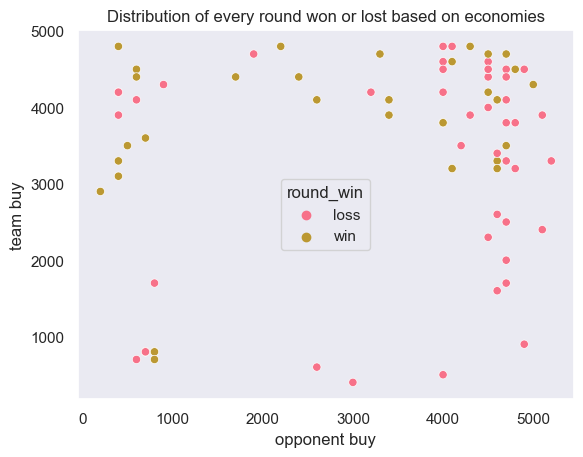

In [198]:
sns.set_palette("husl") 
sns.scatterplot(df, x=df['oppo_buy'],y=df['team_buy'],hue=df['round_win'])
plt.xlabel('opponent buy')
plt.ylabel('team buy')
plt.title('Distribution of every round won or lost based on economies')

In [ ]:
funny ka chda

In [ ]:
def load_concat_csv(paths):
    
    header = ['first_kill', 'time', 'first_death', 'spike_plant', 'defuse', 'fb_team', 'fb_players', 'dt_players',
              'team_buy', 'oppo_buy', 'total_kills', 'total_deaths', 'awps_info', 'side', 'round_win']

    df = pd.DataFrame()
    for path in paths:
        data = pd.read_csv(path)
        df = pd.concat([df, data], axis=0)
    
    return df